#### EDA_and_Preprocessing
Objective: The main objective of this project is to design and implement a robust data preprocessing system that addresses common challenges such as missing values, outliers, inconsistent formatting, and noise. By performing effective data preprocessing, the project aims to enhance the quality, reliability, and usefulness of the data for machine learning. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#### Import dataset

In [8]:
df=pd.read_excel("C:\\Users\\GAYATHRY N S\\OneDrive\\Desktop\\MODULE 5 ML\\Employee ASS 2.xlsx")
df

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


#### 1 Data Exploration: Explore the data, list down the unique values in each feature and find its length. Perform the statistical analysis and renaming of the columns.

##### * List unique values & lengths

In [18]:
for col in df.columns:
    unique_vals = df[col].unique()
    print(f"Column: {col}")
    print(f"Unique Values: {unique_vals}")
    print(f"Number of Unique Values: {len(unique_vals)}\n")


Column: Company
Unique Values: ['TCS' 'Infosys' 'CTS' nan 'Tata Consultancy Services' 'Congnizant'
 'Infosys Pvt Lmt']
Number of Unique Values: 7

Column: Age
Unique Values: [20. 30. 35. 40. 23. nan 34. 45. 18. 22. 32. 37. 50. 21. 46. 36. 26. 41.
 24. 25. 43. 19. 38. 51. 31. 44. 33. 17.  0. 54.]
Number of Unique Values: 30

Column: Salary
Unique Values: [  nan 2300. 3000. 4000. 5000. 6000. 7000. 8000. 9000. 1089. 1234. 3030.
 3045. 3184. 4824. 5835. 7084. 8943. 8345. 9284. 9876. 2034. 7654. 2934.
 4034. 5034. 8202. 9024. 4345. 6544. 6543. 3234. 4324. 5435. 5555. 8787.
 3454. 5654. 5009. 5098. 3033.]
Number of Unique Values: 41

Column: Place
Unique Values: ['Chennai' 'Mumbai' 'Calcutta' 'Delhi' 'Podicherry' 'Cochin' nan 'Noida'
 'Hyderabad' 'Bhopal' 'Nagpur' 'Pune']
Number of Unique Values: 12

Column: Country
Unique Values: ['India']
Number of Unique Values: 1

Column: Gender
Unique Values: [0 1]
Number of Unique Values: 2



In [12]:
df.shape

(148, 6)

#### * Statistical analysis

In [20]:
df.describe()


,Age,Salary,Gender
count,130.000000,124.000000,148.000000
mean,30.484615,5312.467742,0.222973
std,11.096640,2573.764683,0.417654
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,32.500000,5000.000000,0.000000
75%,37.750000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


#### * Renaming Columns

In [27]:
df.rename(columns={
    'Company': 'company',
    'Age': 'age',
    'Salary': 'salary',
    'Place': 'place',
    'Country': 'country',
    'Gender': 'gender'
}, inplace=True)
df


,company,age,salary,place,country,gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


### Data Cleaning
Find the missing and inappropriate values, treat them appropriately.
Remove all duplicate rows.
Find the outliers.
Replace the value 0 in age as NaN
Treat the null values in all columns using any measures(removing/ replace the values with mean/median/mode)



### (a)  Find Missing and Inappropriate Values

In [32]:
print(df.isnull().sum())  # Check missing values
print((df['age'] == 0).sum())  # Find age=0 cases


company     8
age        18
salary     24
place      14
country     0
gender      0
dtype: int64
6


### (b)  Replace age=0 with NaN

In [38]:
df['age'] = df['age'].replace(0, np.nan)
df

,company,age,salary,place,country,gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


### (c) Remove Duplicate Rows

In [41]:
df.drop_duplicates(inplace=True)
df

,company,age,salary,place,country,gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
142,Infosys Pvt Lmt,22.0,8202.0,Mumbai,India,0
143,TCS,33.0,9024.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


### (d)  Handle Null Values (Replacing with Mean/Mode)


df['age'].fillna(df['age'].mean(), inplace=True)
df['salary'].fillna(df['salary'].mean(), inplace=True)
df['place'].fillna(df['place'].mode()[0], inplace=True)
df['company'].fillna(df['company'].mode()[0], inplace=True)
df


### (c) Outliers detection using IQR Method

In [49]:
Q1 = df['salary'].quantile(0.25)
Q3 = df['salary'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['salary'] < (Q1 - 1.5 * IQR)) | (df['salary'] > (Q3 + 1.5 * IQR))]
print(outliers)


Empty DataFrame
Columns: [company, age, salary, place, country, gender]
Index: []


### Data Analysis: 
Filter the data with age >40 and salary<5000
Plot the chart with age and salary
Count the number of people from each place and represent it visually



In [53]:
filtered_df = df[(df['age'] > 40) & (df['salary'] < 5000)]
print(filtered_df)


     company   age  salary      place country  gender
21   Infosys  50.0  3184.0      Delhi   India       0
32   Infosys  45.0  4034.0   Calcutta   India       0
39   Infosys  41.0  3000.0     Mumbai   India       0
50   Infosys  41.0  3000.0    Chennai   India       0
57   Infosys  51.0  3184.0  Hyderabad   India       0
68   Infosys  43.0  4034.0     Mumbai   India       0
75   Infosys  44.0  3000.0     Cochin   India       0
86   Infosys  41.0  3000.0      Delhi   India       0
93   Infosys  54.0  3184.0     Mumbai   India       0
104  Infosys  44.0  4034.0      Delhi   India       0
122  Infosys  44.0  3234.0     Mumbai   India       0
129  Infosys  50.0  3184.0   Calcutta   India       0
138      CTS  44.0  3033.0     Cochin   India       0
140  Infosys  44.0  4034.0  Hyderabad   India       0
145  Infosys  44.0  4034.0      Delhi   India       1


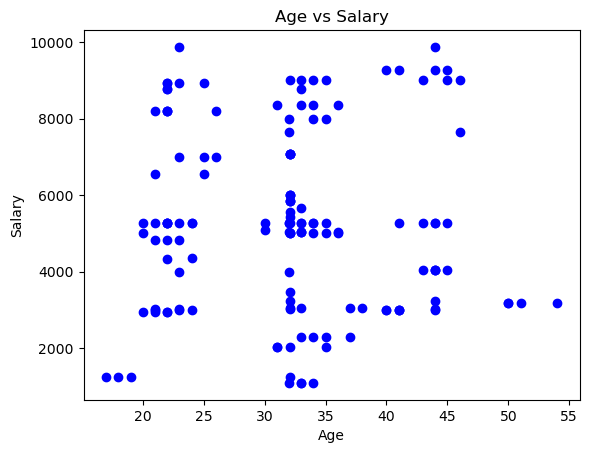

In [57]:


plt.scatter(df['age'], df['salary'], color='blue')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Age vs Salary')
plt.show()


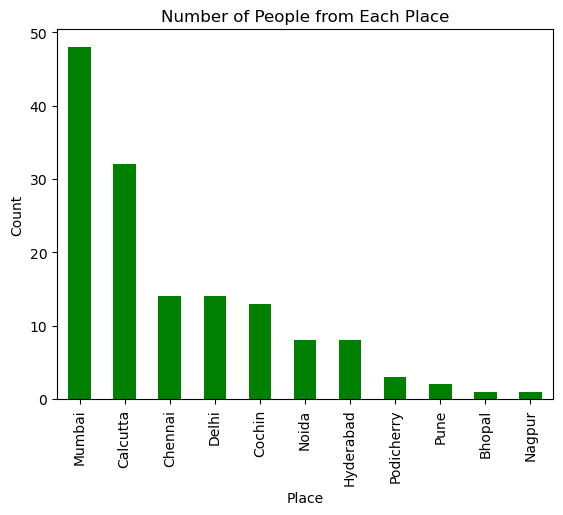

In [59]:
place_counts = df['place'].value_counts()

place_counts.plot(kind='bar', color='green')
plt.xlabel('Place')
plt.ylabel('Count')
plt.title('Number of People from Each Place')
plt.show()


### Data Encoding: 
Convert categorical variables into numerical representations using techniques such as one-hot encoding, label encoding, making them suitable for analysis by machine learning algorithms

In [64]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['company_encoded'] = le.fit_transform(df['company'])
df['place_encoded'] = le.fit_transform(df['place'])
df['country_encoded'] = le.fit_transform(df['country'])
df

,company,age,salary,place,country,gender,company_encoded,place_encoded,country_encoded
0,TCS,20.0,5283.471074,Chennai,India,0,4,2,0
1,Infosys,30.0,5283.471074,Mumbai,India,0,2,6,0
2,TCS,35.0,2300.000000,Calcutta,India,0,4,1,0
3,Infosys,40.0,3000.000000,Delhi,India,0,2,4,0
4,TCS,23.0,4000.000000,Mumbai,India,0,4,6,0
...,...,...,...,...,...,...,...,...,...
142,Infosys Pvt Lmt,22.0,8202.000000,Mumbai,India,0,3,6,0
143,TCS,33.0,9024.000000,Calcutta,India,1,4,1,0
145,Infosys,44.0,4034.000000,Delhi,India,1,2,4,0
146,TCS,33.0,5034.000000,Mumbai,India,1,4,6,0


#### On hot encoding

In [67]:
df = pd.get_dummies(df, columns=['company', 'place', 'country'], drop_first=True)
df

,age,salary,gender,company_encoded,place_encoded,country_encoded,company_Congnizant,company_Infosys,company_Infosys Pvt Lmt,company_TCS,...,place_Calcutta,place_Chennai,place_Cochin,place_Delhi,place_Hyderabad,place_Mumbai,place_Nagpur,place_Noida,place_Podicherry,place_Pune
0,20.0,5283.471074,0,4,2,0,False,False,False,True,...,False,True,False,False,False,False,False,False,False,False
1,30.0,5283.471074,0,2,6,0,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
2,35.0,2300.000000,0,4,1,0,False,False,False,True,...,True,False,False,False,False,False,False,False,False,False
3,40.0,3000.000000,0,2,4,0,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False
4,23.0,4000.000000,0,4,6,0,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,22.0,8202.000000,0,3,6,0,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
143,33.0,9024.000000,1,4,1,0,False,False,False,True,...,True,False,False,False,False,False,False,False,False,False
145,44.0,4034.000000,1,2,4,0,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False
146,33.0,5034.000000,1,4,6,0,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False


### Feature Scaling:
After the process of encoding, perform the scaling of the features using standardscaler and minmaxscaler.

In [72]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

# Example on age and salary columns
df['age_standard'] = scaler_standard.fit_transform(df[['age']])
df['salary_standard'] = scaler_standard.fit_transform(df[['salary']])

df['age_minmax'] = scaler_minmax.fit_transform(df[['age']])
df['salary_minmax'] = scaler_minmax.fit_transform(df[['salary']])

df

,age,salary,gender,company_encoded,place_encoded,country_encoded,company_Congnizant,company_Infosys,company_Infosys Pvt Lmt,company_TCS,...,place_Hyderabad,place_Mumbai,place_Nagpur,place_Noida,place_Podicherry,place_Pune,age_standard,salary_standard,age_minmax,salary_minmax
0,20.0,5283.471074,0,4,2,0,False,False,False,True,...,False,False,False,False,False,False,-1.467376,0.000000,0.081081,0.477350
1,30.0,5283.471074,0,2,6,0,False,True,False,False,...,False,True,False,False,False,False,-0.248759,0.000000,0.351351,0.477350
2,35.0,2300.000000,0,4,1,0,False,False,False,True,...,False,False,False,False,False,False,0.360549,-1.264122,0.486486,0.137817
3,40.0,3000.000000,0,2,4,0,False,True,False,False,...,False,False,False,False,False,False,0.969858,-0.967526,0.621622,0.217480
4,23.0,4000.000000,0,4,6,0,False,False,False,True,...,False,True,False,False,False,False,-1.101791,-0.543818,0.162162,0.331285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,22.0,8202.000000,0,3,6,0,False,False,True,False,...,False,True,False,False,False,False,-1.223652,1.236606,0.135135,0.809491
143,33.0,9024.000000,1,4,1,0,False,False,False,True,...,False,False,False,False,False,False,0.116826,1.584894,0.432432,0.903039
145,44.0,4034.000000,1,2,4,0,False,True,False,False,...,False,False,False,False,False,False,1.457305,-0.529412,0.729730,0.335154
146,33.0,5034.000000,1,4,6,0,False,False,False,True,...,False,True,False,False,False,False,0.116826,-0.105703,0.432432,0.448959


#### StandardScaler normalized the data with mean 0 and standard deviation 1.
MinMaxScaler rescaled features to a [0,1] range.
Scaling ensures that models won’t be biased due to feature magnitude differences.

### Dataset is now cleaned, free from duplicates, missing values handled, and ready for machine learning:
Properly encoded
Scaled for ML Models
Outliers identified
This preprocessing pipeline increases data quality and reliability, making the dataset robust for further analysis or predictive modeling.
